In [1]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report


random_state = 27

In [2]:
def load_images_and_labels(categories):
    img_lst=[]
    labels=[]
    for index, category in enumerate(categories):
        for image_name in os.listdir(f'data/{category}'): #path to the folders with data
            img = cv2.imread(f'data/{category}/{image_name}') #path to the folders
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

            img_array = cv2.resize(img, (150,150)) 

            img_lst.append(img_array)
            labels.append(index)
    return img_lst, labels

categories = ['disco', 'electro', 'folk', 'rap', 'rock'] 

img_lst, labels = load_images_and_labels(categories)




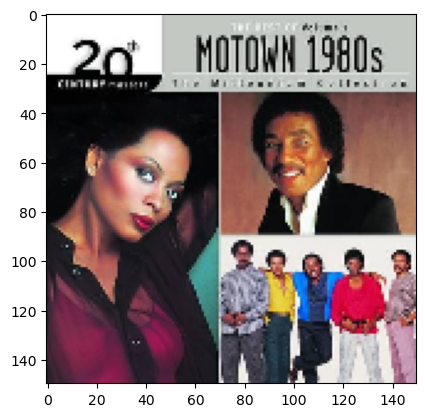

In [5]:
plt.imshow(img_lst[27])
plt.show()

In [6]:
images = np.array(img_lst) / 255.0 #normalization
labels = to_categorical(labels)  #one hot encoding


In [7]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.4, random_state=random_state)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=random_state)


In [8]:
print("x_train shape: ", x_train.shape)
print("y_train.shape: ", y_train.shape)


print("x_test shape: ", x_test.shape)
print("y_test.shape: ", y_test.shape)

print("x_test shape: ", x_val.shape)
print("y_test.shape: ", y_val.shape)

x_train shape:  (4468, 150, 150, 3)
y_train.shape:  (4468, 5)
x_test shape:  (3725, 150, 150, 3)
y_test.shape:  (3725, 5)
x_test shape:  (1118, 150, 150, 3)
y_test.shape:  (1118, 5)


In [14]:
model = Sequential()

# Add model layers
# Convolution layer to extract features from the input image, and then create 32 5x5 ReLu convoluted features
# The input shape is the (150, 150, 3) because the images are 150x150 pixels and have three color channels.
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(150, 150, 3)))

# Pooling layer with MaxPooling
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add another convolution layer
model.add(Conv2D(64, (5, 5), activation='relu'))

# Add another pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten layer to flatten the 2D arrays to 1D array before building the fully connected layers
model.add(Flatten())

# Add layers
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))

# Add the output layer with 5 units and a softmax activation function
model.add(Dense(5, activation='softmax'))


In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 146, 146, 32)      2432      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 64)        51264     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 34, 34, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 73984)             0         
                                                                 
 dense_4 (Dense)             (None, 256)              

In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [17]:
history = model.fit(x_train, y_train, epochs=10, batch_size=100, validation_data=(x_val, y_val))


Epoch 1/10
45/45 [==============================] - 44s 951ms/step - loss: 1.6350 - accuracy: 0.2182 - val_loss: 1.6083 - val_accuracy: 0.2165
Epoch 2/10
45/45 [==============================] - 42s 932ms/step - loss: 1.6032 - accuracy: 0.2252 - val_loss: 1.6090 - val_accuracy: 0.1986
Epoch 3/10
45/45 [==============================] - 43s 963ms/step - loss: 1.5855 - accuracy: 0.2538 - val_loss: 1.5998 - val_accuracy: 0.2567
Epoch 4/10
45/45 [==============================] - 42s 925ms/step - loss: 1.4696 - accuracy: 0.3599 - val_loss: 1.6005 - val_accuracy: 0.2979
Epoch 5/10
45/45 [==============================] - 43s 946ms/step - loss: 1.1931 - accuracy: 0.5139 - val_loss: 1.7651 - val_accuracy: 0.2996
Epoch 6/10
45/45 [==============================] - 42s 930ms/step - loss: 0.8361 - accuracy: 0.6806 - val_loss: 2.2614 - val_accuracy: 0.3041
Epoch 7/10
45/45 [==============================] - 42s 937ms/step - loss: 0.5393 - accuracy: 0.8136 - val_loss: 3.0900 - val_accuracy: 0.3148

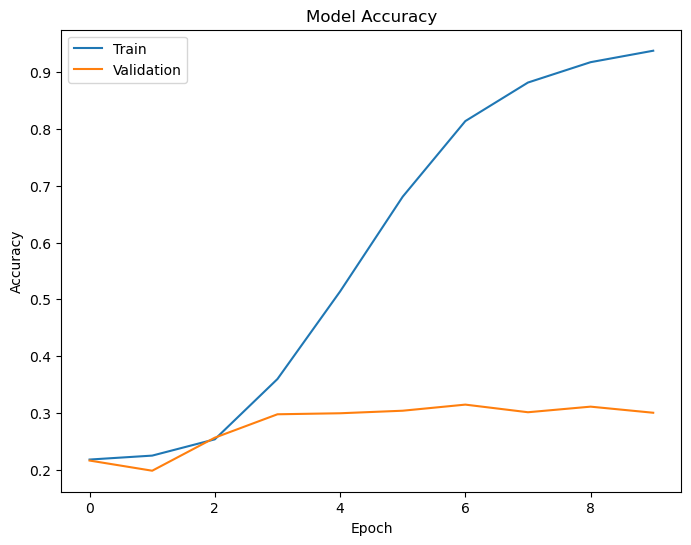

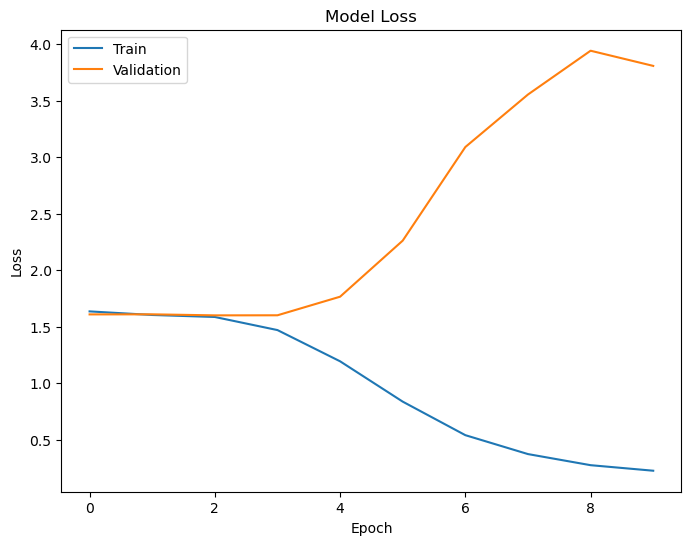

In [18]:
# summarize history for accuracy
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [19]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print(classification_report(y_true, y_pred_classes))

117/117 [==============================] - 10s 80ms/step
              precision    recall  f1-score   support

           0       0.29      0.27      0.28       719
           1       0.35      0.35      0.35       752
           2       0.28      0.23      0.25       777
           3       0.38      0.39      0.38       732
           4       0.28      0.34      0.31       745

    accuracy                           0.31      3725
   macro avg       0.31      0.32      0.31      3725
weighted avg       0.31      0.31      0.31      3725



Hisotry:


weighted avg 0.29, 0.31